In [41]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos

In [42]:
df = pd.read_csv("precios_musicales_limpio.csv")

In [43]:
df.shape
df.info()
df.isna().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   obra                8 non-null      object 
 1   fecha               8 non-null      object 
 2   día                 8 non-null      object 
 3   precio_min          8 non-null      float64
 4   precio_max          8 non-null      float64
 5   ciudad              8 non-null      object 
 6   precio_estandar     8 non-null      float64
 7   productora          8 non-null      object 
 8   teatro              8 non-null      object 
 9   incluye_gastos      7 non-null      object 
 10  fuente              8 non-null      object 
 11  diferencia_precios  8 non-null      float64
dtypes: float64(4), object(8)
memory usage: 900.0+ bytes


obra                  8
fecha                 3
día                   2
precio_min            8
precio_max            8
ciudad                2
precio_estandar       8
productora            4
teatro                8
incluye_gastos        1
fuente                8
diferencia_precios    8
dtype: int64

In [44]:
# Tipificación correcta
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

df["incluye_gastos"] = df["incluye_gastos"].astype("category")


In [45]:
df.dtypes


obra                          object
fecha                 datetime64[ns]
día                           object
precio_min                   float64
precio_max                   float64
ciudad                        object
precio_estandar              float64
productora                    object
teatro                        object
incluye_gastos              category
fuente                        object
diferencia_precios           float64
dtype: object

In [46]:
df. head()

,obra,fecha,día,precio_min,precio_max,ciudad,precio_estandar,productora,teatro,incluye_gastos,fuente,diferencia_precios
0,El rey león,2026-03-28,sábado,52.92,183.60,Madrid,131.76,Stage,Lope de vega,si,Entradas para El Rey León | Página Oficial,130.68
1,Cenicienta,2026-03-28,sábado,37.99,170.00,Madrid,105.00,Stage,Coliseum,si,Entradas de Cenicienta el Musical | Página Ofi...,132.01
2,Los pilares de la tierra,2026-01-31,sabádo,37.80,110.16,Madrid,73.44,Beón,EDP Gran Vía,si,"Los pilares de la Tierra, el musical | beon. e...",72.36
3,Los miserables,2026-03-28,sábado,49.90,120.00,Madrid,109.90,ATG/SOM,Nuevo Apolo,si,entradas.com,70.10
4,Wicked,2026-03-28,sábado,39.00,119.01,Madrid,103.00,ATG/SOM,Nuevo Alcalá,NaN,https://wickedelmusical.com/entradas/,80.01


In [47]:
# ============================
# 5. Consistencia de precios
# ============================
# precio_max siempre debe ser >= precio_min
df[df["precio_max"] < df["precio_min"]]


,obra,fecha,día,precio_min,precio_max,ciudad,precio_estandar,productora,teatro,incluye_gastos,fuente,diferencia_precios


In [48]:
# ============================
# 7. KPI básicos
# ============================

kpi = {
    "precio_mínimo": df["precio_estandar"].min(),
    "precio_medio":  df["precio_estandar"].mean(),
    "precio_máximo": df["precio_estandar"].max(),
    "diferencia_media": df["diferencia_precios"].mean(),
    "porcentaje_gastos_incluidos": df["incluye_gastos"].value_counts(normalize=True).get("sí", 0) * 100
}

kpi


{'precio_mínimo': 54.0,
 'precio_medio': np.float64(90.40375),
 'precio_máximo': 131.76,
 'diferencia_media': np.float64(73.12125),
 'porcentaje_gastos_incluidos': 0}

In [49]:
# ============================
# 8. Ranking por obra
# ============================

df[["obra","precio_estandar"]].sort_values("precio_estandar", ascending=False)


,obra,precio_estandar
0,El rey león,131.76
3,Los miserables,109.90
1,Cenicienta,105.00
4,Wicked,103.00
7,"The book of mormon, el musical",77.13
2,Los pilares de la tierra,73.44
6,Mamma mia!,69.00
5,We will rock you,54.00


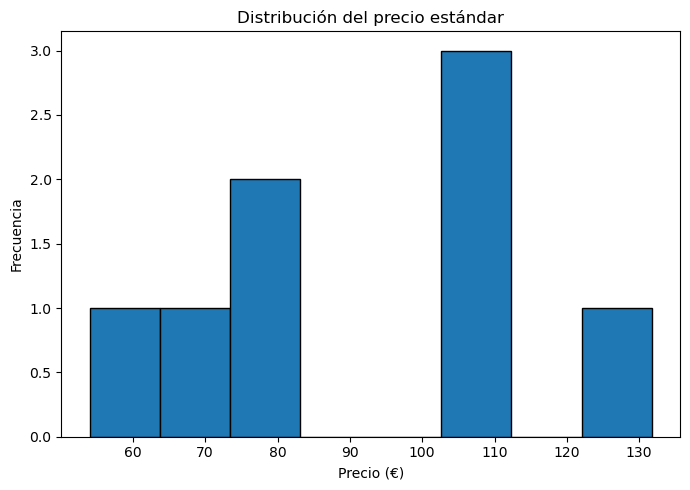

In [50]:
# ============================
# 6. Distribución de precios
# ============================

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(df["precio_estandar"], bins=8, edgecolor="black")
plt.title("Distribución del precio estándar")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


In [51]:
# Guardar dataset limpio y validado
df.to_csv("precios_musicales_limpio_final.csv", index=False)

print("CSV guardado como precios_musicales_limpio_final .csv")


CSV guardado como precios_musicales_limpio_final .csv


CONCLUSIONES TÉCNICAS — EDA Precios Musicales 

– El dataset recoge 8 musicales con precios mínimo, máximo y estándar, junto con teatro, ciudad, productora y si incluyen gastos.
– No hay nulos relevantes salvo un registro faltante en “incluye_gastos”, sin impacto en los cálculos principales.
– El cálculo de precio_estandar se ejecuta correctamente; los valores están entre 54€ y 131.76€.
– La diferencia media entre precio máximo y mínimo es 73.12€, según el output del notebook.
– Ningún musical indica incluir gastos (0%), lo que homogeneiza los criterios de precio.
– El ranking de precios estándar queda encabezado por El Rey León (131.76€) y cierra We Will Rock You (54€).
– El CSV final se guarda correctamente como precios_musicales_limpio_final.csv.